# Recurrent Neural Network - LSTM - Technical Indicators

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use("bmh")
import ta

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

Using TensorFlow backend.


### Loading the Data

In [2]:
df = pd.read_csv("SPY.csv")

#### Datetime Conversion

In [3]:
# Datetime conversion
df['Date'] = pd.to_datetime(df.Date)

# Setting the index
df.set_index('Date', inplace=True)

# Dropping any NaNs
df.dropna(inplace=True)

## Preprocessing Data
### Technical Indicators

In [4]:
# Adding all the indicators
df = ta.add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

# Dropping everything else besides 'Close' and the Indicators
df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

/anaconda3/lib/python3.7/site-packages/ta/trend.py:543: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/anaconda3/lib/python3.7/site-packages/ta/trend.py:547: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


In [ ]:
# Checking the new df with indicators
print(df.shape)

df.tail()

(1259, 69)


,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-20,281.589996,9.758614e+09,3123000,0.108700,2.494802e+08,-4.238480,9.854261,2.199030e+06,4397.661273,9.967225,...,57.442325,86.843335,90.392116,-13.156665,16.012970,274.724285,14.397726,-1.761798,-1.777503,33.600603
2020-04-21,273.040009,9.675057e+09,-123262700,0.107666,5.946928e+07,-43.059485,6.310811,-5.601204e+06,4397.661273,9.927503,...,52.040436,67.142901,84.155187,-32.857099,15.880175,274.682078,8.422351,-3.036325,-3.083376,29.544055
2020-04-22,279.100006,9.681689e+09,-29738100,0.056928,1.319392e+08,17.164732,12.200850,-1.761745e+06,4495.265336,9.730752,...,55.543583,80.800788,78.262341,-19.199212,16.591764,274.874652,12.454170,2.219454,2.195182,32.419225
2020-04-23,279.079987,9.590294e+09,-134447800,0.045893,1.127913e+08,11.846180,13.744688,2.068225e+06,4495.265336,9.276677,...,47.237425,80.465771,76.136487,-19.534229,17.955146,274.941452,5.368875,-0.007173,-0.007173,32.409727
2020-04-24,282.970001,9.651474e+09,-49384600,0.002832,1.439493e+08,-1.497683,13.366690,1.178160e+06,4557.923520,8.869011,...,53.139243,88.934352,83.400304,-11.065648,17.599414,275.062826,6.728773,1.393871,1.384246,34.255347


In [ ]:
# Only using the last 1000 days of data to get a more accurate representation of the current climate
df = df.tail(1000)

### Scaling

In [ ]:
# Scale fitting the close prices separately for inverse_transformations purposes later
close_scaler = StandardScaler()

close_scaler.fit(df[['Close']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Normalizing/Scaling the Data
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

df.tail(10)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volatility_atr,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-13,0.397916,1.346059,-0.106703,-0.725071,1.720820,-1.981046,5.365438,0.632860,2.889671,3.777039,...,0.378348,0.734183,0.983212,0.734183,0.042071,0.139311,3.034797,-0.792971,-0.785830,0.397916
2020-04-14,0.654485,1.395494,0.047067,-0.277402,2.248422,3.873011,4.837521,0.960057,2.889671,3.667485,...,0.300026,1.049022,0.994932,1.049022,0.694543,0.177189,2.213746,2.422399,2.379088,0.654485
2020-04-15,0.464188,1.368603,-0.092525,-0.587194,1.445392,-0.337764,3.711653,0.485309,2.761917,3.531161,...,0.235271,0.538824,0.839454,0.538824,1.037984,0.194728,2.471145,-1.801792,-1.804291,0.464188
2020-04-16,0.506476,1.404504,0.058557,-0.558466,1.383656,-0.562220,2.712815,-0.538982,2.761917,3.233930,...,-0.268151,0.650315,0.809233,0.650315,1.296835,0.249089,1.680859,0.368738,0.371663,0.506476
2020-04-17,0.744426,1.456228,0.226704,-0.429589,1.970030,2.237895,3.197063,1.481639,2.761917,3.129351,...,0.761293,1.081012,0.820760,1.081012,1.470932,0.338004,2.902965,2.216153,2.179670,0.744426
2020-04-20,0.585056,1.412175,0.111947,-0.009922,1.364117,-0.407263,2.886522,0.741423,2.658240,2.920808,...,0.054181,0.684075,0.873101,0.684075,1.753641,0.378596,3.761579,-1.499584,-1.497879,0.585056
2020-04-21,0.315233,1.371849,-0.032931,-0.016269,0.449216,-4.145228,1.851564,-1.664797,2.658240,2.904340,...,-0.473200,0.012036,0.643098,0.012036,1.738279,0.377255,2.152849,-2.560629,-2.578724,0.315233
2020-04-22,0.506476,1.375050,0.074278,-0.327493,0.798158,1.653592,3.571905,-0.480399,2.786548,2.822771,...,-0.131191,0.477946,0.425785,0.477946,1.820600,0.383371,3.238322,1.814812,1.790235,0.506476
2020-04-23,0.505845,1.330940,-0.045752,-0.395180,0.705961,1.141483,4.022824,0.701072,2.786548,2.634521,...,-0.942113,0.466517,0.347389,0.466517,1.978324,0.385492,1.330772,-0.038857,-0.032612,0.505845


### Plotting

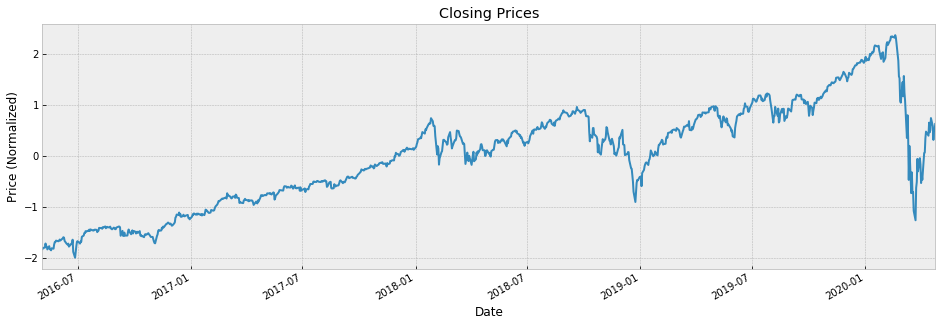

In [ ]:
# Plotting the Closing Prices
df['Close'].plot(figsize=(16,5))
plt.title("Closing Prices")
plt.ylabel("Price (Normalized)")
plt.show()

### Functions to prepare the data for LSTM

In [ ]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the multivariate time sequence
    """
    
    # Creating a list for both variables
    X, y = [], []
    
    for i in range(len(seq)):
        
        # Finding the end of the current sequence
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        # Breaking out of the loop if we have exceeded the dataset's length
        if out_end > len(seq):
            break
        
        # Splitting the sequences into: x = past prices and indicators, y = prices ahead
        seq_x, seq_y = seq[i:end, :], seq[end:out_end, 0]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [ ]:
def visualize_training_results(results):
    """
    Plots the loss and accuracy for the training and testing data
    """
    history = results.history
    plt.figure(figsize=(16,5))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure(figsize=(16,5))
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

In [ ]:
def layer_maker(n_layers, n_nodes, activation, drop=None, d_rate=.5):
    """
    Creates a specified number of hidden layers for an RNN
    Optional: Adds regularization option - the dropout layer to prevent potential overfitting (if necessary)
    """
    
    # Creating the specified number of hidden layers with the specified number of nodes
    for x in range(1,n_layers+1):
        model.add(LSTM(n_nodes, activation=activation, return_sequences=True))

        # Adds a Dropout layer after every Nth hidden layer (the 'drop' variable)
        try:
            if x % drop == 0:
                model.add(Dropout(d_rate))
        except:
            pass

In [ ]:
def validater(n_per_in, n_per_out):
    """
    Runs a 'For' loop to iterate through the length of the DF and create predicted values for every stated interval
    Returns a DF containing the predicted values for the model
    """
    
    # Creating an empty DF to store the predictions
    predictions = pd.DataFrame(index=df.index, columns=[df.columns[0]])

    for i in range(n_per_in, len(df)-n_per_in, n_per_out):
        # Creating rolling intervals to predict off of
        x = df[-i - n_per_in:-i]

        # Predicting using rolling intervals
        yhat = model.predict(np.array(x).reshape(1, n_per_in, n_features))

        # Transforming values back to their normal prices
        yhat = close_scaler.inverse_transform(yhat)[0]

        # DF to store the values and append later
        pred_df = pd.DataFrame(yhat, 
                               index=pd.date_range(start=x.index[-1], 
                                                   periods=len(yhat), 
                                                   freq="D"),
                               columns=[x.columns[0]])

        # Updating the predictions DF
        predictions.update(pred_df)
        
    return predictions

### Splitting the Data

In [ ]:
# How many periods looking back to learn
n_per_in  = 90

# How many periods to predict
n_per_out = 30

# Features 
n_features = df.shape[1]

# Splitting the data into appropriate sequences
X, y = split_sequence(df.to_numpy(), n_per_in, n_per_out)

## Modeling - LSTM (RNN)

### Creating the Neural Network

In [ ]:
# Instatiating the model
model = Sequential()

# Activation
activ = "tanh"

# Input layer
model.add(LSTM(90, 
               activation=activ, 
               return_sequences=True, 
               input_shape=(n_per_in, n_features)))

# Hidden layers
layer_maker(n_layers=2, 
            n_nodes=90, 
            activation=activ)

# Final Hidden layer
model.add(LSTM(30, activation=activ))

# Output layer
model.add(Dense(n_per_out))

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 90, 90)            57600     
_________________________________________________________________
lstm_2 (LSTM)                (None, 90, 90)            65160     
_________________________________________________________________
lstm_3 (LSTM)                (None, 90, 90)            65160     
_________________________________________________________________
lstm_4 (LSTM)                (None, 30)                14520     
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
Total params: 203,370
Trainable params: 203,370
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the data with selected specifications
model.compile(optimizer='adadelta', loss='mse', metrics=['accuracy'])

### Fitting and Training the RNN

In [ ]:
res = model.fit(X, y, epochs=500, batch_size=256, validation_split=0.1)


Train on 792 samples, validate on 89 samples
Epoch 1/500
792/792 [==============================] - 5s 6ms/step - loss: 0.5464 - accuracy: 0.0391 - val_loss: 2.2826 - val_accuracy: 0.0225
Epoch 2/500
792/792 [==============================] - 3s 4ms/step - loss: 0.3517 - accuracy: 0.0328 - val_loss: 1.9085 - val_accuracy: 0.0225
Epoch 3/500
792/792 [==============================] - 3s 4ms/step - loss: 0.2580 - accuracy: 0.0303 - val_loss: 1.6958 - val_accuracy: 0.0225
Epoch 4/500
792/792 [==============================] - 3s 4ms/step - loss: 0.1931 - accuracy: 0.0227 - val_loss: 1.5745 - val_accuracy: 0.0112
Epoch 5/500
792/792 [==============================] - 3s 4ms/step - loss: 0.1642 - accuracy: 0.0253 - val_loss: 1.4571 - val_accuracy: 0.0449
Epoch 6/500
792/792 [==============================] - 3s 4ms/step - loss: 0.1258 - accuracy: 0.0455 - val_loss: 1.3360 - val_accuracy: 0.0225
Epoch 7/500
792/792 [==============================] - 3s 4ms/step - loss: 0.1031 - accuracy: 0.

### Plotting the Accuracy and Loss

In [ ]:
visualize_training_results(res)

## Visualizing the Predictions

### Validating the Model 
Plotting the difference between the Actual closing prices and the Predicted prices

In [ ]:
# Transforming the actual values to their original price
actual = pd.DataFrame(close_scaler.inverse_transform(df[["Close"]]), 
                      index=df.index, 
                      columns=[df.columns[0]])

# Getting a DF of the predicted values to validate against
predictions = validater(n_per_in, n_per_out)
    
# Plotting
plt.figure(figsize=(16,8))

# Plotting those predictions
plt.plot(predictions, label='Predicted')

# Plotting the actual values
plt.plot(actual, label='Actual')

plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.xlim('2017-05', '2020-05')
plt.show()

### Predicting/Forecasting the future prices

In [ ]:
# Predicting off of y because it contains the most recent dates
yhat = model.predict(np.array(df.tail(n_per_in)).reshape(1, n_per_in, n_features))

# Transforming the predicted values back to their original prices
yhat = close_scaler.inverse_transform(yhat)[0]

# Creating a DF of the predicted prices
preds = pd.DataFrame(yhat, 
                     index=pd.date_range(start=df.index[-1], 
                                         periods=len(yhat), 
                                         freq="D"), 
                     columns=[df.columns[0]])

# Printing the predicted prices
print(preds)

# Number of periods back to visualize the actual values
pers = 90

# Transforming the actual values to their original price
actual = pd.DataFrame(close_scaler.inverse_transform(df[["Close"]].tail(pers)), 
                      index=df.Close.tail(pers).index, 
                      columns=[df.columns[0]]).append(preds.head(1))

# Plotting
plt.figure(figsize=(16,5))
plt.plot(actual, label="Actual Prices")
plt.plot(preds, label="Predicted Prices")
plt.ylabel("Price")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(yhat)} days")
plt.legend()
plt.show()